In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 11-12: Classification

Today we will look into another important task in machine learning which is classification. With classification, we want to determine to which (discrete) class a given instance belongs.


Our example for today is eye-state classification from EEG signals. The task to determine the eye state: open or close based on multiple non-invasive brain EEG signals. Since we are classifying instances into two classes, this task is also called **binary classification**.

In [2]:
import scipy.io.arff
(rawdata, metadata) = scipy.io.arff.loadarff('EEG Eye State.arff')

In [3]:
metadata

Dataset: EEG_DATA
	AF3's type is numeric
	F7's type is numeric
	F3's type is numeric
	FC5's type is numeric
	T7's type is numeric
	P7's type is numeric
	O1's type is numeric
	O2's type is numeric
	P8's type is numeric
	T8's type is numeric
	FC6's type is numeric
	F4's type is numeric
	F8's type is numeric
	AF4's type is numeric
	eyeDetection's type is nominal, range is ('0', '1')

Each data column describes EEG reading at a specific location.

<img src="eeg_location.jpg" width="400px">

In [4]:
df = pd.DataFrame(rawdata)

In [5]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [6]:
df.groupby('eyeDetection').mean()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
eyeDetection,,,,,,,,,,,,,,
0,4298.402552,4013.083756,4262.462922,4200.391388,4341.752633,4664.726001,4140.387390,4615.393493,4200.367181,4229.695026,4200.264826,4277.434783,4600.899882,4456.567286
1,4350.798517,4005.694999,4265.937779,4121.413696,4341.726881,4618.594772,4073.570684,4616.871687,4241.497964,4233.307279,4205.149143,4281.441017,4632.774892,4367.147507


In [7]:
df.groupby('eyeDetection').std()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
eyeDetection,,,,,,,,,,,,,,
0,71.727033,54.006143,49.172179,7026.078621,42.109983,3939.432964,6197.052117,35.723325,48.380447,47.996940,35.944185,48.448991,77.430622,7935.067845
1,3719.031369,33.028602,37.710772,26.527445,22.610379,18.992404,34.213632,18.532877,3188.564108,19.742126,39.769668,30.889516,1801.617595,35.723321


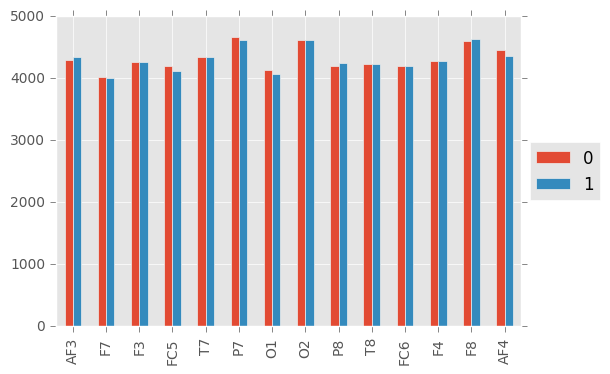

In [8]:
df.groupby('eyeDetection').mean().transpose().plot(kind='bar').legend(loc='center left', bbox_to_anchor=(1, 0.5))

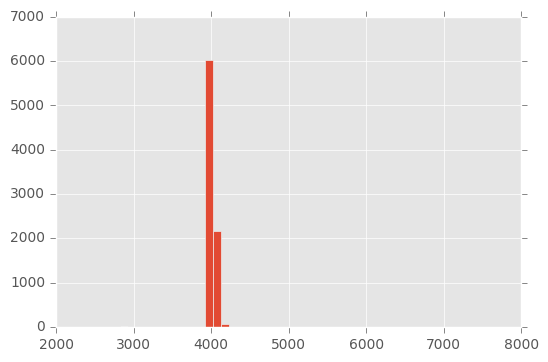

In [9]:
df[df['eyeDetection'] == '0']['F7'].hist(bins=50)

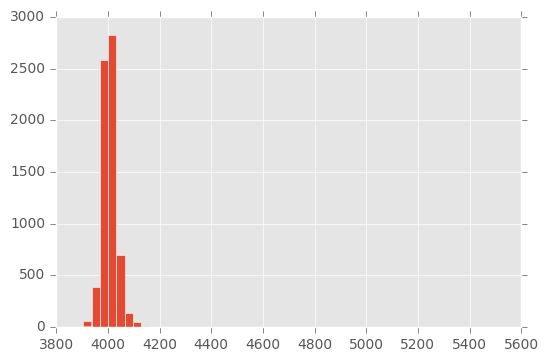

In [10]:
df[df['eyeDetection'] == '1']['F7'].hist(bins=50)

In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:14].as_matrix()
y = df['eyeDetection'].as_matrix()
print X.shape
print y.shape 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

print X_train.shape
print X_test.shape

(14980, 14)
(14980,)
(10036, 14)
(4944, 14)


## Logistic Regression

The idea here is to apply a linear model to binary classification. In binary classification, we have a sample with some features. Based on the features, we want to know whether it belongs to a binary class or not. The probability that the output is 1 given its input could be represented as:

$$
P(y=1∣x)
$$

If the data samples have $n$ features, and we think we can represent this probability via some linear combination, we could represent this as:

$$
P(y=1∣x)=w_0+w_1 x_1+w_2 x_2+...+w_nx_n
$$

The regression algorithm could fit these weights to the data it sees, however, it would seem hard to map an arbitrary linear combination of inputs, each would may range from $-\infty$ to $\infty$ to a probability value in the range of 0 to 1.

To get around this, we could model instead by using *the log of the odds ratio*.

$$
\log \frac{P(Y=1|x)}{1-P(Y=1|x)} =  w_0+w_1 x_1+w_2 x_2+...+w_nx_n
$$

and, after rearranging, we will have the logistic function:

$$
P(Y=1|x) = \frac{1}{1 + e^{-(w_0+w_1 x_1+w_2 x_2+...+w_nx_n)}}
$$

Read more about this in Chapter 4.4 of Element of Statistical Learning

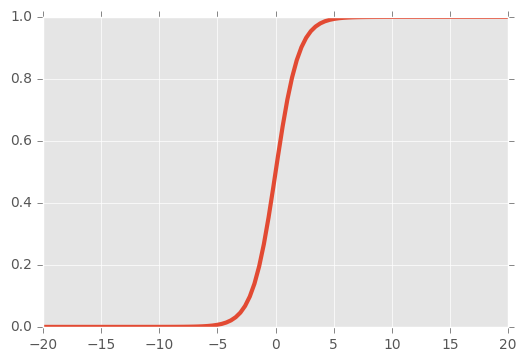

In [12]:
nx = np.linspace(-20,20,100)
ny = 1.0/(1+np.exp(-nx))
plt.plot(nx,ny,lw=3)

## How to train a logistic regression model

Logistic regression models are usually fit by maximum likelihood through gradient descent method.

In [13]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

print LRmodel.coef_
print LRmodel.intercept_

print "Train accuracy", LRmodel.score(X_train,y_train)
print "Test accuracy", LRmodel.score(X_test,y_test)

[[ 0.00641847 -0.0197601   0.01280969 -0.01015116  0.03805185 -0.0406886
   0.00278978  0.00074566  0.00557959  0.00347244 -0.00962764  0.00761106
  -0.00100886  0.00481457]]
[  4.87525690e-06]
Train accuracy 0.645077720207
Test accuracy 0.6446197411


In [14]:
# Improved version #

from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=100000)

newCol = np.log(X_train[:,1] + X_train[:,2])
X_train2 = np.concatenate([X_train, newCol.reshape(-1, 1)], axis=1)

newCol_test = np.log(X_test[:,1] + X_test[:,2])
X_test2 = np.concatenate([X_test, newCol_test.reshape(-1, 1)], axis=1)

LRmodel.fit(X_train2, y_train)


LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
print LRmodel.coef_
print LRmodel.intercept_

print "Train accuracy", LRmodel.score(X_train2,y_train)
print "Test accuracy", LRmodel.score(X_test2,y_test)

[[  6.58104457e-03  -1.98844511e-02   1.28731404e-02  -1.01267325e-02
    3.83876896e-02  -4.10195231e-02   2.65520053e-03   8.99217740e-04
    5.39856585e-03   3.63501203e-03  -9.72127218e-03   7.77309038e-03
   -1.02209845e-03   4.62460509e-03   2.90754749e-05]]
[  3.69060545e-06]
Train accuracy 0.645376644081
Test accuracy 0.645226537217


## Linear Classifier

The idea is to use a linear separator to separate instances of one class from another. Take a look at the following example.

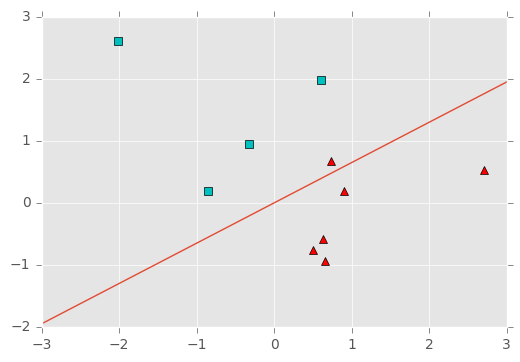

In [16]:
np.random.seed(101)
x1 = np.random.randn(10)
x2 = np.random.randn(10)
y = (x1 > 0) & (x2 < 1)
plt.plot(x1[y],x2[y],'^r')
plt.plot(x1[np.logical_not(y)],x2[np.logical_not(y)],'sc')

nx = np.linspace(-3,3,100)
ny = 0.65*nx
plt.plot(nx,ny)

(4200, 4400)

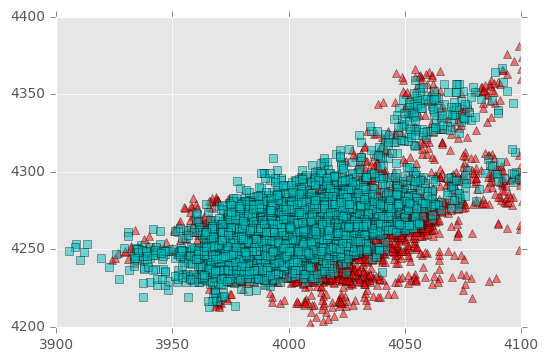

In [17]:
plt.plot(X_train[y_train=='0',1],X_train[y_train=='0',2],'^r',alpha=0.5)
plt.plot(X_train[y_train=='1',1],X_train[y_train=='1',2],'sc',alpha=0.5)
plt.xlim([3900,4100])
plt.ylim([4200,4400])

In [18]:
from sklearn.linear_model import Perceptron
PTmodel = Perceptron()
PTmodel.fit(X_train, y_train)

print "Train accuracy", PTmodel.score(X_train,y_train)
print "Test accuracy", PTmodel.score(X_test,y_test)

Train accuracy 0.449382223994
Test accuracy 0.448017799353


## Support Vector Machine

Sometimes, it is impossible to linearly separate the data in its original space. Then, why not bring our data into a higher-dimensional space! This is called *kernel trick*. In short, a kernel function is applied to the data points and then a separating hyperplane is trained in the kernel space. 

In [19]:
# class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, 
#                       shrinking=True, probability=False, tol=0.001, cache_size=200, 
#                       class_weight=None, verbose=False, max_iter=-1, 
#                       decision_function_shape=None, random_state=None)

from sklearn.svm import SVC
SVCmodel = SVC(kernel='rbf')
SVCmodel.fit(X_train, y_train)

print "Train accuracy", SVCmodel.score(X_train,y_train)
print "Test accuracy", SVCmodel.score(X_test,y_test)

Train accuracy 1.0
Test accuracy 0.551982200647


## Decision Tree

A decision tree uses a tree structure to represent a number of possible decision paths and an outcome for each path. If you have played the Twenty Question game before, it is very similar to that.

### Building a DT

In order to build a decision tree, we will need to decide what questions to ask and in what order. At each stage of the tree there are some possibilities we’ve eliminated and some that we haven’t. 

Ideally, we’d like to choose questions whose answers give a lot of information about what our tree should predict. If there’s a single yes/no question for which “yes” answers always correspond to True outputs and “no” answers to False outputs (or vice versa), this would be an awesome question to pick. Conversely, a yes/no question for which neither answer gives you much new information about what the prediction should be is probably not a good choice.

Suppose we have the following data

<table>
<tr>
<td>Instance#</td>
<td>X1</td>
<td>X2</td>
<td>Y</td>
</tr>
<tr>
<td>1</td>
<td>2</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>2</td>
<td>3</td>
<td>7</td>
<td>0</td>
</tr>
<tr>
<td>3</td>
<td>4</td>
<td>2</td>
<td>1</td>
</tr>
<tr>
<td>4</td>
<td>5</td>
<td>8</td>
<td>1</td>
</tr>
</table>

How do we choose a split? Let's consider three candidate splits: "X1>2?", "X1>3?" and "X2>3?". Which one is "better"? There are many ways to measure goodness of a split.

First let's consider each split.

- "X1>2" will split the tree into {1 x class 0} and {1 x class 0, 2 x class 1}
- "X1>3" will split the tree into {2 x class 0} and {2 x class 1}
- "X2>3" will split the tree into {1 x class 0, 1 x class 0} and {1 x class 0, 1 x class 1}


#### Gini impurity index

Gini impurity measures the probability of a random sample being classified incorrectly if we pick a label at random w.r.t the distribution of a branch.

The Gini index is given by:
$$
gini = \sum_k p_k (1-p_k)
$$

- "X1>2" will have gini index of $(1/4)*(1*0) + (3/4)*((1/3)(1-1/3) + (2/3)(1-2/3)) = (3/4)(4/9) = 1/3$
- "X1>3" will have gini index of $(2/4)*(1*0) + (2/4)*(1*0) = 0$
- "X2>3" will have gini index of $(2/4)*((1/2)(1-1/2) + (1/2)(1-1/2)) + (2/4)*((1/2)(1-1/2) + (1/2)(1-1/2)) = 1/2$


#### Entropy

We can also use cross-entropy to determine which split is better.

The cross-entropy is given by:
$$
H = \sum_k -p_k \lg p_k
$$

- "X1>2" will have cross-entropy of $(1/4)*(-1 \lg 1) + (3/4)(-1/3 \lg1/3 - 2/3 \lg 2/3) = 0.17$ 
- "X1>3" will have cross-entropy of $(2/4)*(-1 \lg 1) + (2/4)(-1 \lg 1) = 0$ 
- "X2>3" will have cross-entropy of $(2/4)*(-1/2 \lg 1/2 + -1/2 \lg 1/2) + (2/4)(-1/2 \lg 1/2 - 1/2 \lg 1/2) = 1.0$ 





In [20]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier()
DTmodel.fit(X_train, y_train)

# Training error
print "Train accuracy", DTmodel.score(X_train,y_train)
print "Test accuracy", DTmodel.score(X_test,y_test)

Train accuracy 1.0
Test accuracy 0.825647249191


In [21]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
DTmodel.fit(X_train, y_train)

# Training error
print "Train accuracy", DTmodel.score(X_train,y_train)
print "Test accuracy",DTmodel.score(X_test,y_test)

# from sklearn import tree
# DTmodel = tree.DecisionTreeClassifier(max_depth=3, criterion='gini')
# DTmodel.fit(X_train, y_train)

# # Training error
# print "Train accuracy", DTmodel.score(X_train,y_train)
# print "Test accuracy",DTmodel.score(X_test,y_test)

Train accuracy 0.667995217218
Test accuracy 0.664644012945


In [23]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(DTmodel, out_file=None, 
                         feature_names=df.columns[:-1],  
                         class_names=('close','open'),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

## Notes

Regression: predicts **real-value** targets ( errors measured by $ L_2 = (\hat{y}-y_i)^2 $ )

Classification: predict **discrete-value** targets ( errors = 1 if misclassify, 0 otherwise )
- "Classify" instances
- e.g. iris (class 1, class 2, class 3) --> multi-class classification
- "binary" classification - 2 classes
    - e.g., Trump vs Not Trump
        
Multi-label classification
- An instance can have more than **one** labels
- e.g., image classification
    - an image can be "beach" and "mountain"

A dataset can be separated **perfectly** by a linear model, we have
this **linearly separable** dataset

### Perceptron Algorithm

- For separable data, it converges to optimal hyperplane
- updates itself towards the direction **optimal** hyperplane

$ \hat{y} = sgn(\vec{w} \cdot \vec{x} ) $

$ \vec{w} = \text{model params} $

where $ sgn(x) $ = 1 if $ x $ > 0, -1 otherwise

### Perceptron Training Alogorithm

1. start with a random $ \vec{w} $
2. In crease tally **update** the $ \vec{w} $ so that misclassified points move closer to the correct side

### Perceptron

- Nothing happen if classified correctly
- will not converge if the data is not linearly separable
- when converge, it can converge to different solutions (depends on where start)
- the number of steps to converge can be large (depends on complexity of data)

### SVM

We want to optimize 
$$ || \vec{w} ||^2 + \lambda \sum{S_i} $$

s.t.

$$ w \cdot \vec{x}^{(+)} + b > + 1 $$
$$ w \cdot \vec{x}^{(-)} + b < - 1 $$

- slack variable

### Kernel Trick

from 1-D to 2-D -->  $ \phi(x) $

$ K(x, y) = \phi(x) \cdot \phi(y) $

$ K(x, y) $ is kernel function

# Assn 5 -- Eye state classification

Experiment with Logistic Regression and Decision tree. Train a good model for the task!